# Configs

In [1]:
# TPOT configuration

# Search spaces:
# - "linear": A linear pipeline
# - "linear-light": A linear pipeline with no inner classifiers
# - "graph": A graph-based pipeline
# - "graph-light": A graph-based pipeline with no inner classifiers
# - "mdr": A multifactor dimensionality reduction pipeline (used for genetic data)

automl_settings = {
    "search_space": "linear",
    "generations":10, # Number of generations to run
    "population_size":30, # Number of individuals in each generation (genetic alg population size)
    "max_time_mins":None,
    "scorers":["roc_auc"],
    "scorers_weights":[1],
    "classification":True,
    "cv":5, # Number of cross-validation folds
    "random_state":42, 
    "verbose":3,
    "n_jobs":4,
}

In [2]:
from sklearn.metrics import classification_report, roc_auc_score
from tpot import TPOTEstimator

class ModelResults:
    automl: TPOTEstimator
    report: str
    roc_auc: float
    y_pred_proba: list

    def __init__(self, automl, report, roc_auc, y_pred_proba, y_test_bin=None):
        self.automl = automl
        self.report = report
        self.roc_auc = roc_auc
        self.y_pred_proba = y_pred_proba
        self.y_test_bin = y_test_bin

def run_automl(X, y, args, X_test, y_test, bin=None):
    automl = TPOTEstimator(**args)
    automl.fit(X, y)

    y_pred = automl.predict(X_test)
    y_pred_proba = automl.predict_proba(X_test)
    
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

    y_test_bin = y_test if bin is None else (y_test == bin).astype(int)
    
    return ModelResults(automl, report, roc_auc, y_pred_proba, y_test_bin)

# ADULT INCOME

## Data

In [3]:
from libs.paths import PATHS
from libs.pre_processing.training_data import read_data, train_test_split
from libs.pre_processing.pipeline import make_pipeline

Current directory: c:\Users\Alvaro Lima\My Files\Projects\automl-tcc\src
Source path found in current directory.


In [4]:
# Raw data
X, y = read_data(PATHS["ADULT_INCOME"], "income")

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

# Pre-processed data
pipeline = make_pipeline(X_train)
X_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

c:\Users\Alvaro Lima\My Files\Projects\automl-tcc\src\libs\pre_processing\training_data.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path, sep=sep)


## TPOT

### Results

In [5]:
# Pre-processed data results
adultinc_results = run_automl(X_transformed, y_train, automl_settings, X_test_transformed, y_test)

c:\Users\Alvaro Lima\miniconda3\envs\tpot\lib\site-packages\tpot\tpot_estimator\estimator.py:535: UserWarning: Labels are not encoded as ints from 0 to N. For compatibility with some classifiers such as sklearn, TPOT has encoded y with the sklearn LabelEncoder. When using pipelines outside the main TPOT estimator class, you can encode the labels with est.label_encoder_
  warnings.warn("Labels are not encoded as ints from 0 to N. For compatibility with some classifiers such as sklearn, TPOT has encoded y with the sklearn LabelEncoder. When using pipelines outside the main TPOT estimator class, you can encode the labels with est.label_encoder_")
Generation:  10%|█         | 1/10 [17:59<2:41:57, 1079.70s/it]

Generation:  1
Best roc_auc_score score: 0.9187074998645031


Generation:  20%|██        | 2/10 [39:02<2:38:17, 1187.16s/it]

Generation:  2
Best roc_auc_score score: 0.9243423163171258


Generation:  30%|███       | 3/10 [52:53<1:59:34, 1024.86s/it]

Generation:  3
Best roc_auc_score score: 0.9243423163171258


Generation:  40%|████      | 4/10 [1:11:28<1:46:01, 1060.28s/it]

Generation:  4
Best roc_auc_score score: 0.9243487866326625


Generation:  50%|█████     | 5/10 [1:24:10<1:19:24, 952.91s/it] 

Generation:  5
Best roc_auc_score score: 0.9244042519800384


Generation:  60%|██████    | 6/10 [1:35:31<57:21, 860.48s/it]  

Generation:  6
Best roc_auc_score score: 0.9250690232924971


Generation:  70%|███████   | 7/10 [1:49:01<42:10, 843.66s/it]

Generation:  7
Best roc_auc_score score: 0.9250690232924971


Generation:  80%|████████  | 8/10 [2:12:49<34:19, 1029.86s/it]

Generation:  8
Best roc_auc_score score: 0.92516686091344


Generation:  90%|█████████ | 9/10 [2:26:26<16:03, 963.36s/it] 

Generation:  9
Best roc_auc_score score: 0.9253838095889113


Generation: 100%|██████████| 10/10 [2:43:09<00:00, 978.92s/it]

Generation:  10
Best roc_auc_score score: 0.9260518667421327



c:\Users\Alvaro Lima\miniconda3\envs\tpot\lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (74) found smaller than n_clusters (99). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Alvaro Lima\miniconda3\envs\tpot\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\Alvaro Lima\miniconda3\envs\tpot\lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (16) found smaller than n_clusters (99). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Alvaro Lima\miniconda3\envs\tpot\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  

# Online Shop

## Data

In [6]:
from libs.paths import PATHS
from libs.pre_processing.training_data import read_data, train_test_split
from libs.pre_processing.pipeline import make_pipeline

In [7]:
# Raw data
X, y = read_data(PATHS["ONLINE_SHOP"], "Revenue")

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

# Pre-processed data
pipeline = make_pipeline(X_train)
X_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

c:\Users\Alvaro Lima\My Files\Projects\automl-tcc\src\libs\pre_processing\training_data.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path, sep=sep)


In [8]:
X.shape, y.shape

((12330, 17), (12330,))

## TPOT

In [9]:
# Pre-processed data results
online_results = run_automl(X_transformed, y_train, automl_settings, X_test_transformed, y_test)

Generation:  10%|█         | 1/10 [05:07<46:04, 307.12s/it]

Generation:  1
Best roc_auc_score score: 0.9265072657466323


Generation:  20%|██        | 2/10 [10:56<44:15, 331.96s/it]

Generation:  2
Best roc_auc_score score: 0.9268236158500495


Generation:  30%|███       | 3/10 [16:08<37:40, 322.99s/it]

Generation:  3
Best roc_auc_score score: 0.9317248419629968


Generation:  40%|████      | 4/10 [17:40<23:10, 231.75s/it]

Generation:  4
Best roc_auc_score score: 0.9326869419931165


Generation:  50%|█████     | 5/10 [19:03<14:51, 178.20s/it]

Generation:  5
Best roc_auc_score score: 0.9328071858427428


Generation:  60%|██████    | 6/10 [20:35<09:54, 148.62s/it]

Generation:  6
Best roc_auc_score score: 0.9328071858427428


Generation:  70%|███████   | 7/10 [23:36<07:58, 159.48s/it]

Generation:  7
Best roc_auc_score score: 0.9357791191591092


Generation:  80%|████████  | 8/10 [25:00<04:30, 135.34s/it]

Generation:  8
Best roc_auc_score score: 0.9357791191591092


Generation:  90%|█████████ | 9/10 [27:15<02:15, 135.17s/it]

Generation:  9
Best roc_auc_score score: 0.9357791191591092


Generation: 100%|██████████| 10/10 [29:53<00:00, 179.38s/it]

Generation:  10
Best roc_auc_score score: 0.9357791191591092


# Bank Telemarketing

## Data

In [10]:
from libs.paths import PATHS
from libs.pre_processing.training_data import read_data, train_test_split
from libs.pre_processing.pipeline import make_pipeline

In [11]:
# Raw data
X, y = read_data(PATHS["BANK_MARKETING"], "y", sep=';')

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

# Pre-processed data
pipeline = make_pipeline(X_train)
X_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [12]:
X.shape, y.shape

((45211, 16), (45211,))

## TPOT

In [13]:
# Pre-processed data results
bank_results = run_automl(X_transformed, y_train, automl_settings, X_test_transformed, y_test)

c:\Users\Alvaro Lima\miniconda3\envs\tpot\lib\site-packages\tpot\tpot_estimator\estimator.py:535: UserWarning: Labels are not encoded as ints from 0 to N. For compatibility with some classifiers such as sklearn, TPOT has encoded y with the sklearn LabelEncoder. When using pipelines outside the main TPOT estimator class, you can encode the labels with est.label_encoder_
  warnings.warn("Labels are not encoded as ints from 0 to N. For compatibility with some classifiers such as sklearn, TPOT has encoded y with the sklearn LabelEncoder. When using pipelines outside the main TPOT estimator class, you can encode the labels with est.label_encoder_")
Generation:  10%|█         | 1/10 [14:45<2:12:49, 885.55s/it]

Generation:  1
Best roc_auc_score score: 0.9238982422037287


Generation:  20%|██        | 2/10 [34:43<2:22:33, 1069.13s/it]

Generation:  2
Best roc_auc_score score: 0.9240716313244739


Generation:  30%|███       | 3/10 [44:15<1:38:15, 842.15s/it] 

Generation:  3
Best roc_auc_score score: 0.925128436752118


Generation:  40%|████      | 4/10 [51:59<1:09:18, 693.16s/it]

Generation:  4
Best roc_auc_score score: 0.9264461986429948


Generation:  50%|█████     | 5/10 [59:30<50:28, 605.74s/it]  

Generation:  5
Best roc_auc_score score: 0.928146029478342


Generation:  60%|██████    | 6/10 [1:03:50<32:32, 488.23s/it]

Generation:  6
Best roc_auc_score score: 0.9291574665794167


Generation:  70%|███████   | 7/10 [1:14:12<26:35, 531.79s/it]

Generation:  7
Best roc_auc_score score: 0.9303153415764763


Generation:  80%|████████  | 8/10 [1:20:07<15:50, 475.49s/it]

Generation:  8
Best roc_auc_score score: 0.9309755883218426


Generation:  90%|█████████ | 9/10 [1:29:30<08:22, 502.88s/it]

Generation:  9
Best roc_auc_score score: 0.9343354794733042


Generation: 100%|██████████| 10/10 [1:39:25<00:00, 596.56s/it]

Generation:  10
Best roc_auc_score score: 0.9343354794733042


# Results

### Best estimators

In [14]:
print("Adult Income Results:\n")

print(adultinc_results.report)
print("Best pipeline:")
print(adultinc_results.automl.fitted_pipeline_)
print(f"ROC AUC: {adultinc_results.roc_auc:.4f}")

Adult Income Results:

              precision    recall  f1-score   support

       <=50K       0.96      0.82      0.88     11233
        >50K       0.60      0.88      0.71      3420

    accuracy                           0.83     14653
   macro avg       0.78      0.85      0.80     14653
weighted avg       0.87      0.83      0.84     14653

Best pipeline:
Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('selectpercentile',
                 SelectPercentile(percentile=74.5132849545214)),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transformer_list=[('kbinsdiscretizer',
                                                                                 KBinsDiscretizer(encode='onehot-dense',
                                                                                                  n_bins=99,
                                                    

In [60]:
print("Bank Marketing Results:\n")

print("Adult Income Results:\n")

#print(bank_results.report)
print("Best pipeline:")
print(bank_results.automl.fitted_pipeline_)
print(f"ROC AUC: {bank_results.roc_auc:.4f}")

Bank Marketing Results:

Adult Income Results:

Best pipeline:
Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('passthrough', Passthrough()),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transformer_list=[('fastica-1',
                                                                                 FastICA(algorithm='deflation',
                                                                                         n_components=37,
                                                                                         random_state=42)),
                                                                                ('fastica-2',
                                                                                 FastICA(n_components=1,
                                                                                         random_state=42))])),
         

In [61]:
bank_results.automl.fitted_pipeline_

Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('passthrough', Passthrough()),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transformer_list=[('fastica-1',
                                                                                 FastICA(algorithm='deflation',
                                                                                         n_components=37,
                                                                                         random_state=42)),
                                                                                ('fastica-2',
                                                                                 FastICA(n_components=1,
                                                                                         random_state=42))])),
                                                ('passthrough',
                                                 Passthrough())])),
                ('feature...
                               feature_types=None, gamma=0.0008462826104,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.0527537153873, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=10,
                               max_leaves=None, min_child_weight=15,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100, n_jobs=1,
                               nthread=1, num_parallel_tree=None, ...))])

In [16]:
print("Online Shopping Results:\n")

print(online_results.report)
print("Best pipeline:")
print(online_results.automl.fitted_pipeline_)
print(f"ROC AUC: {online_results.roc_auc:.4f}")

Online Shopping Results:

              precision    recall  f1-score   support

       False       0.93      0.95      0.94      3124
        True       0.71      0.61      0.66       575

    accuracy                           0.90      3699
   macro avg       0.82      0.78      0.80      3699
weighted avg       0.90      0.90      0.90      3699

Best pipeline:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('variancethreshold',
                 VarianceThreshold(threshold=0.1070280238532)),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transformer_list=[('rbfsampler',
                                                                                 RBFSampler(gamma=0.3127317715463,
                                                                                            n_components=7,
                                                          

### ROC AUC Curves

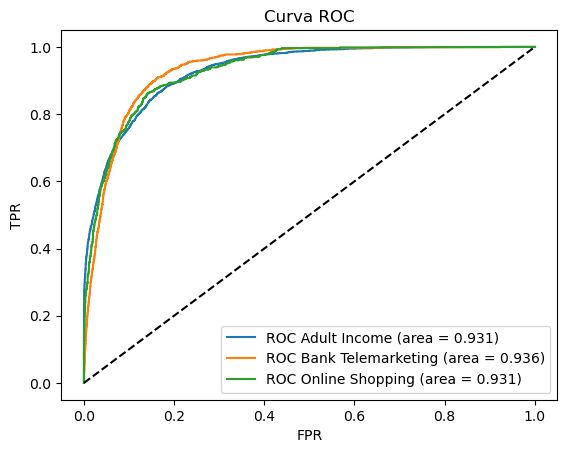

In [63]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

ai_test = (adultinc_results.y_test_bin == ">50K").astype(int) 
br_test = (bank_results.y_test_bin == "yes").astype(int)

# Plotando a curva ROC
fpr, tpr, thresholds = roc_curve(ai_test, adultinc_results.y_pred_proba[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(br_test, bank_results.y_pred_proba[:, 1])
fpr3, tpr3, thresholds3 = roc_curve(online_results.y_test_bin, online_results.y_pred_proba[:, 1])

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Adult Income (area = {adultinc_results.roc_auc:.3f})')
plt.plot(fpr2, tpr2, label=f'ROC Bank Telemarketing (area = {bank_results.roc_auc:.3f})')
plt.plot(fpr3, tpr3, label=f'ROC Online Shopping (area = {online_results.roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()